# Chapter 03 - Regression

In [6]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.formula.api as smf

colors = plt.cycler(color=["#557A95",   "#957055", "#559570"]) 
sns.set_context('paper', font_scale=1.4)
plt.rcParams['figure.figsize'] = [9,6]
plt.rcParams['savefig.dpi'] = 300
plt.rc("legend", frameon=False)
plt.rc("axes.spines", top=False, right=False)
plt.rcParams['axes.prop_cycle'] = colors
mycolors = colors.by_key()["color"]

In [7]:
# Modules for interactivity
from ipywidgets import interact
import ipywidgets as widgets

In [8]:
# Modules for prediction
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Lineare Regression

### Concept

#### Creating fake data

In [9]:
n = 100
x = np.linspace(-4,4, num=n) # make x data
eps = stats.norm().rvs(n) # create randomness
ytrue = 3 + 4*x + eps*5 # make y data

#### Finding right parameters (i.e. fitting the model)

In [10]:
box = widgets.Checkbox(False, description="show errors")
b0 = widgets.FloatSlider(value=0, min=-10,max=10)
b1 = widgets.FloatSlider(value=0, min=-10,max=10)
def lreg(b0,b1, changed):
    fig, ax = plt.subplots(figsize=(12,7))
    sns.scatterplot(x=x, y=ytrue)
    plt.xlabel("x")
    plt.ylabel("y")
    alpha = 0 if b0==b1==0 else 1
    yhat = b0 + b1*x
    sns.lineplot(x=x, y=yhat, color="red", alpha=alpha,lw=3)
    ax.set_title("Relation y and X")
    error = ytrue - yhat
    if changed:
        rss = np.round(np.sum(error**2)/n, 2)
        ax.vlines(x=x, ymin=yhat, ymax=yhat+error, ls="--", color="gray")
        _, ymax = ax.get_ylim()
        xmin, _ = ax.get_xlim()
        ax.annotate(f"RSS: {rss}", xy=(xmin*0.98,ymax))
    
    sns.despine()

grid = widgets.GridspecLayout(10,6)
grid[0,:] = widgets.HBox([b0,b1,box])
grid[1:10,:] = widgets.interactive_output(lreg, {"b0":b0, "b1": b1, "changed":box})
grid

GridspecLayout(children=(HBox(children=(FloatSlider(value=0.0, max=10.0, min=-10.0), FloatSlider(value=0.0, ma…

## Prediction vs. evaluation

In [25]:
np.random.seed(12323323)
# Create model for illustrative purposes
n = 1000
x1 = stats.norm(10,3).rvs(n)
x2 = stats.poisson(5).rvs(n)
error = stats.norm(0,1).rvs(n) * 200
y = 4 + 10*x1 + 0*x2 + error 

In [26]:
# Load data into dataframe
df = pd.DataFrame(np.c_[x1,x2,y], columns=["x1","x2","y"])
df.head()

,x1,x2,y
0,14.510353,5.0,558.547527
1,12.613276,8.0,117.477594
2,8.177699,5.0,1.601091
3,10.846624,5.0,-82.370197
4,14.539494,5.0,360.089929


In [27]:
# Evaluate model
model = smf.ols("y ~ x1 + x2", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     12.12
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           6.30e-06
Time:                        13:47:18   Log-Likelihood:                -6702.2
No. Observations:                1000   AIC:                         1.341e+04
Df Residuals:                     997   BIC:                         1.343e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3852     25.237     -0.372      0.710     -58.909      40.138
x1             9.7807      2.053      4.763      0.000       5.751      13.810
x2             3.1499      2.730      1.154      0.249      -2.208       8.507
==============================================================================
Omnibus:                        2.175   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                2.029
Skew:                           0.040   Prob(JB):                        0.363
Kurtosis:                       2.794   Cond. No.                         47.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Get yhats from estimated model
yhat = model.fittedvalues
df["yhat"] = yhat
df.head()

,x1,x2,y,yhat
0,14.510353,5.0,558.547527,148.286198
1,12.613276,8.0,117.477594,139.180979
2,8.177699,5.0,1.601091,86.348136
3,10.846624,5.0,-82.370197,112.452201
4,14.539494,5.0,360.089929,148.571216


In [29]:
# Calculate MAE and MAPE
def mae(y,yhat):
    return 1/len(y) * np.sum(np.abs(y - yhat))
def mape(y,yhat):
    return 1/len(y) * np.sum(np.abs((y - yhat)/y))

In [30]:
mae(y,yhat), mape(y,yhat)

(159.56102765167347, 2.8563030279270616)

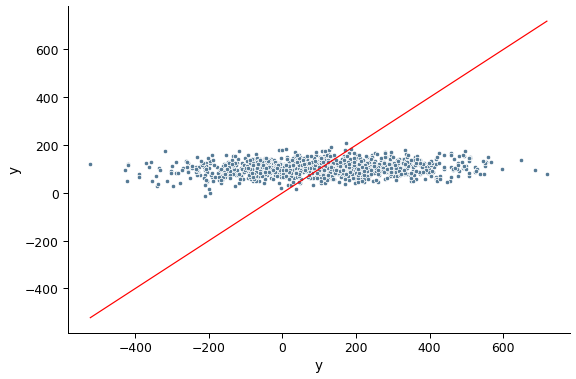

In [31]:
# Plot prediction vs. truth
sns.scatterplot(x="y", y="yhat", data=df, s=20)
sns.lineplot(x="y", y="y", data=df, color="red")

In [32]:
# Build perfect model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [33]:
# Create more complex model
n = 100
x1 = np.linspace(-3,3, num=n)
error = stats.norm(0,1).rvs(n) * 2
y = 4 + 10*np.sin(x1) + error

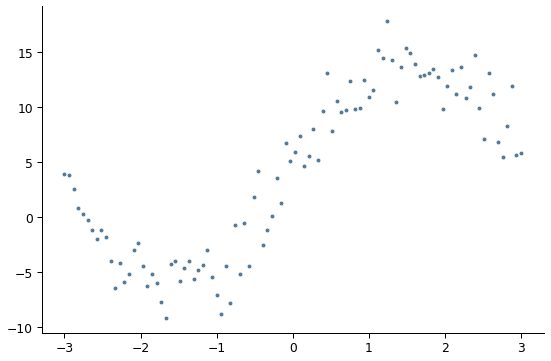

In [34]:
sns.scatterplot(x=x1, y=y)

In [35]:
# Put data into dataframe
df = pd.DataFrame(np.c_[x1,y], columns=["x1", "y"])
df.head()

,x1,y
0,-3.000000,3.892737
1,-2.939394,3.820517
2,-2.878788,2.512475
3,-2.818182,0.785338
4,-2.757576,0.245202


In [36]:
# Estimate linear model using-
model = smf.ols("y ~ x1", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     166.1
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           8.13e-23
Time:                        13:50:44   Log-Likelihood:                -294.67
No. Observations:                 100   AIC:                             593.3
Df Residuals:                      98   BIC:                             598.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0829      0.465      8.772      0.000       3.159       5.007
x1             3.4285      0.266     12.887      0.000       2.901       3.956
==============================================================================
Omnibus:                        3.380   Durbin-Watson:                   0.355
Prob(Omnibus):                  0.185   Jarque-Bera (JB):                1.982
Skew:                          -0.050   Prob(JB):                        0.371
Kurtosis:                       2.318   Cond. No.                         1.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
yhat = model.fittedvalues
df["yhat_lr"] = yhat

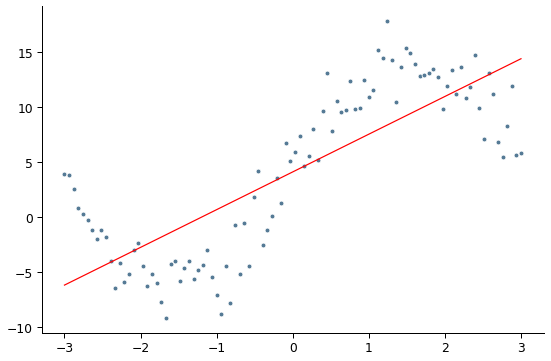

In [38]:
sns.scatterplot(x=x1, y=y)
sns.lineplot(x=x1, y=yhat, color="red")

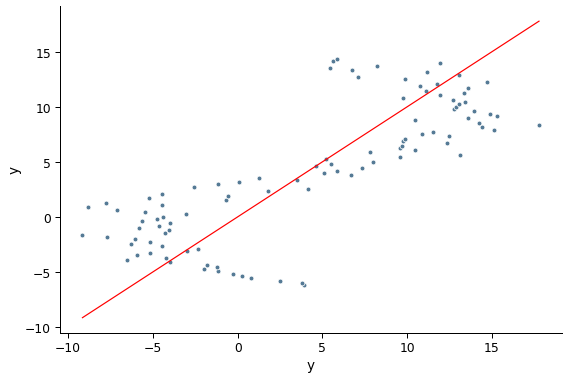

In [39]:
sns.scatterplot(x="y", y="yhat_lr", data=df)
sns.lineplot(x="y", y="y",data=df, color="red")

In [40]:
x1, y = df["x1"].values.reshape(-1,1), df["y"]

dt = DecisionTreeRegressor()
dt.fit(x1,y)

DecisionTreeRegressor()

In [41]:
yhat2 = dt.predict(x1)
x1 = x1.reshape(-1)

In [42]:
df["yhat_dt"] = yhat2

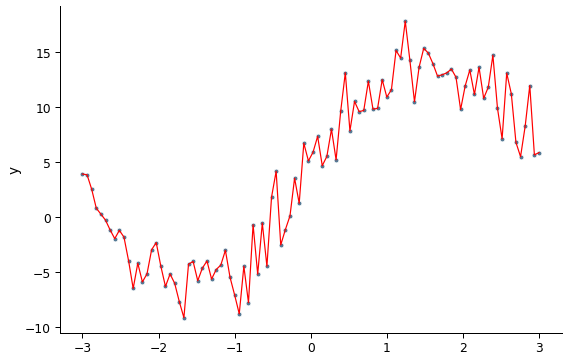

In [43]:
sns.scatterplot(x=x1, y=y)
sns.lineplot(x=x1, y=yhat2, color="red")

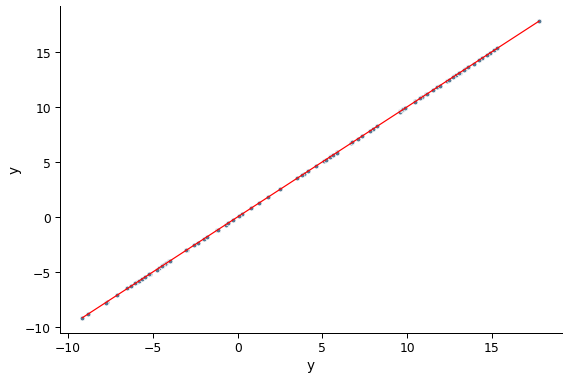

In [44]:
sns.scatterplot(x="y", y="yhat_dt", data=df)
sns.lineplot(x="y", y="y",data=df, color="red")